In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from __future__ import division
import pandas as pd
from sklearn.datasets import load_iris

In [12]:
dataset = load_iris()
X, c = dataset['data'][:,[3,0]], dataset['target']
M, N = X.shape

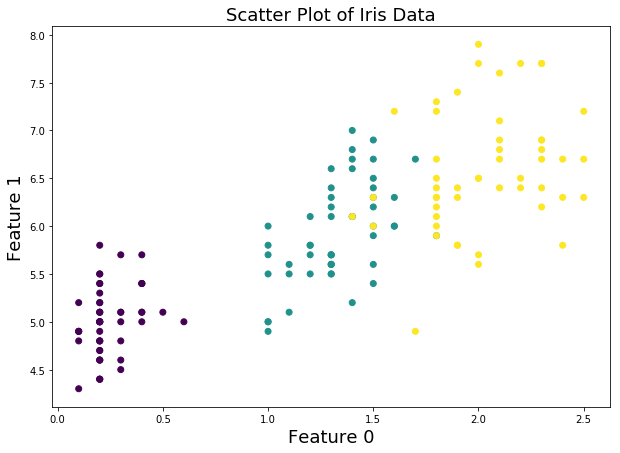

In [13]:
plt.figure(figsize=(10,7))

plt.scatter(X[:,0], X[:,1],c=c)
plt.title('Scatter Plot of Iris Data', fontsize = 18)
plt.xlabel('Feature 0', fontsize = 18)
plt.ylabel('Feature 1', fontsize = 18)
plt.show()

In [14]:
def Gini_Index(vec):
    uniques = np.unique(vec)
    c = len(uniques)
    freq = np.zeros(c)
    for i in range(0,c):
        freq[i] = sum(vec == uniques[i]) / len(vec)
    gini = 1 - sum(np.square(freq))
    return(gini)

In [15]:
def Entropy(vec):
    uniques = np.unique(vec)
    c = len(uniques)
    freq = np.zeros(c)
    for i in range(0,c):
        freq[i] = sum(vec == uniques[i]) / len(vec)
    entropy = -1 * np.dot(np.log(freq),freq)
    return(entropy)

In [16]:
def U_gini(x,c,tau):
    merged = np.transpose(pd.DataFrame([x,c]))
    xc1 = merged.loc[merged.loc[:,0] < tau]
    xc2 = merged.loc[merged.loc[:,0] > tau]
    g1 = Gini_Index(xc1.loc[:,1])
    g2 = Gini_Index(xc2.loc[:,1])
    UG = (xc1.shape[0] / x.shape[0]) * g1 + (xc2.shape[0] / x.shape[0]) * g2
    return(UG)

In [17]:
def U_entropy(x,c,tau):
    merged = np.transpose(pd.DataFrame([x,c]))
    xc1 = merged.loc[merged.loc[:,0] < tau]
    xc2 = merged.loc[merged.loc[:,0] > tau]
    h1 = Entropy(xc1.loc[:,1])
    h2 = Entropy(xc2.loc[:,1])
    UH = (xc1.shape[0] / x.shape[0]) * h1 + (xc2.shape[0] / x.shape[0]) * h2
    return(UH)

In [18]:
XX0 = np.sort(X[:,0])
tau0 = np.zeros((XX0.shape[0]-1))
for i in range(0,(len(tau0))):
    tau0[i]=(XX0[i]+XX0[i+1])/2

XX1 = np.sort(X[:,1])
tau1=np.zeros((X.shape[0]-1))
for i in range(0,(len(tau1))):
    tau1[i]=(XX1[i]+XX1[i+1])/2

In [19]:
def Information_Gain(x,c,tau):
    return (Entropy(c) - U_entropy(x,c,tau))

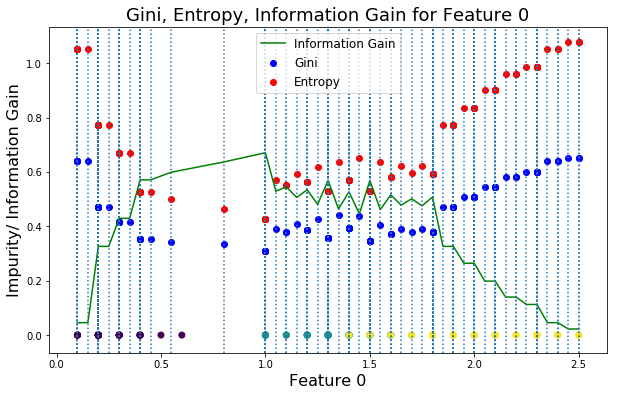

In [20]:
gini_vec0 = np.zeros(len(tau0))
entro_vec0 = np.zeros(len(tau0))
IG_vec0 = np.zeros(len(tau0))
for i in range(0,len(tau0)):
    gini_vec0[i] = U_gini(X[:,0], c, tau0[i])
    entro_vec0[i] = U_entropy(X[:,0], c, tau0[i])
    IG_vec0[i] = Information_Gain(X[:,0], c, tau0[i])
    
    

plt.figure(figsize = (10,6))
# create some x data and some integers for the y axis
x = tau0
y = gini_vec0
y2 = entro_vec0
y3 = IG_vec0

# plot the data

plt.scatter(x,y, label = 'Gini', color = 'b')
plt.scatter(x,y2, label = 'Entropy', color = 'r')
plt.plot(x,y3, label = 'Information Gain', color = 'g')
plt.title('Gini, Entropy, Information Gain for Feature 0', fontsize = 18)
plt.legend(fontsize = 12)
plt.xlabel('Feature 0', fontsize = 16)
plt.ylabel('Impurity/ Information Gain', fontsize = 16)

for t in tau0:
    plt.axvline(t, ls = ':')




plt.scatter(X[:,0], np.zeros(len(X[:,1])),c=c)

plt.show()

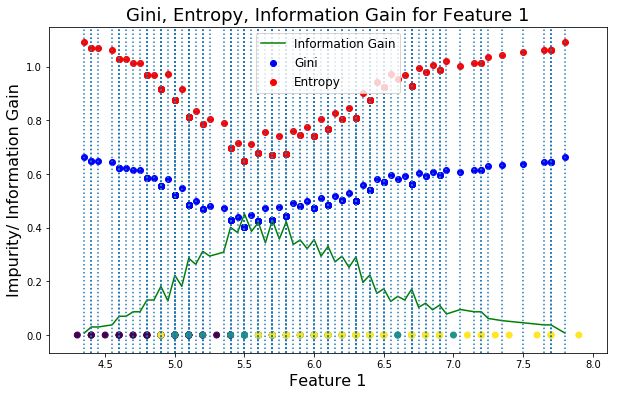

In [21]:
gini_vec1 = np.zeros(len(tau1))
entro_vec1 = np.zeros(len(tau1))
IG_vec1 = np.zeros(len(tau1))
for i in range(0,len(tau1)):
    gini_vec1[i] = U_gini(X[:,1], c, tau1[i])
    entro_vec1[i] = U_entropy(X[:,1], c, tau1[i])
    IG_vec1[i] = Information_Gain(X[:,1], c, tau1[i])

plt.figure(figsize = (10,6))
# create some x data and some integers for the y axis
x = tau1
y = gini_vec1
y2 = entro_vec1
y3 = IG_vec1

# plot the data
plt.scatter(x,y, label = 'Gini',  color = 'b')
plt.scatter(x,y2, label = 'Entropy',  color = 'r')
plt.plot(x,y3, label = 'Information Gain', color = 'g')
plt.title('Gini, Entropy, Information Gain for Feature 1', fontsize = 18)
plt.legend(fontsize = 12,  loc = 9)
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Impurity/ Information Gain', fontsize = 16)

for t in tau1:
    plt.axvline(t, ls = ':')

plt.scatter(X[:,1], np.zeros(len(X[:,1])),c=c)

plt.show()

### ROC Analysis for different Distributions 

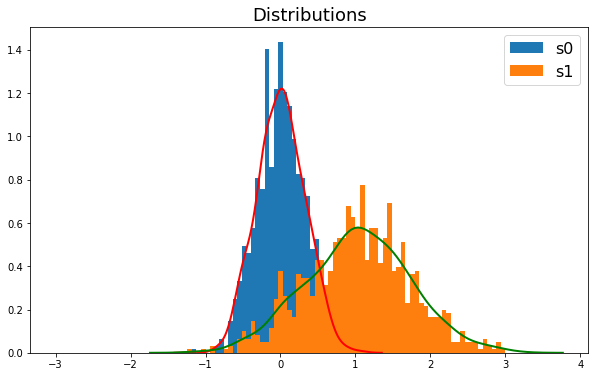

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import seaborn as sns  # for nicer graphics



mu0 = 0
v0 = 0.1
sigma0 = np.sqrt(v0)
s0 = np.random.normal(mu0, sigma0, 1000)


mu1 = 1
v1 = 0.5
sigma1 = np.sqrt(v1)
s1 = np.random.normal(mu1, sigma1, 1000)

plt.figure(figsize = (10,6))

bins = np.linspace(-3,3, 100)
plt.hist(s0, bins, alpha=1, label='s0', normed = True)
plt.hist(s1, bins, alpha=1, label='s1', normed = True)

plt.title('Distributions', fontsize = 18)
plt.legend(loc='upper right', fontsize = 16)

sns.kdeplot(s0, linewidth=2, color = 'r')
sns.kdeplot(s1, linewidth=2, color = 'g')
plt.show()



In [31]:
def fpr_tpr(s0,s1,Tau):
    TP = sum(s1 > Tau)
    FN = sum(s1 < Tau)
    
    FP = sum(s0 > Tau)
    TN = sum(s0 < Tau)
    
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)
    return(fpr, tpr)

In [32]:
s0set = set(s0)
unionset = s0set.union(s1)
Tau_max_gaussian  = max(unionset) + 0.1
Tau_min_gaussian = min(unionset) - 0.1
print(Tau_max_gaussian)
print(Tau_min_gaussian)

3.31727411032
-1.29187768433


In [33]:
tau_vec_gaussian = np.linspace(Tau_min_gaussian, Tau_max_gaussian, 1000)
tpr_vec_gaussian = np.zeros(len(tau_vec_gaussian))
fpr_vec_gaussian = np.zeros(len(tau_vec_gaussian))

for i in range(0, len(tau_vec_gaussian)):
    fpr_vec_gaussian[i], tpr_vec_gaussian[i] = fpr_tpr(s0,s1,tau_vec_gaussian[i])

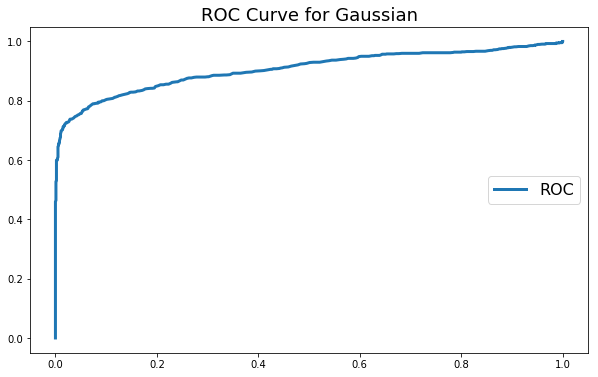

In [34]:
plt.figure(figsize = (10,6))


x = fpr_vec_gaussian
y = tpr_vec_gaussian

# plot the data
plt.plot(x,y, label = 'ROC', linewidth=3)
plt.title('ROC Curve for Gaussian', fontsize = 18)
plt.legend(fontsize = 16, loc = 'center right')
plt.show()

### Triangular Distributions

In [35]:
a0=-3
b0=3

t0 = np.random.triangular(a0, (a0+b0)/2,b0, 10000)

a1= 0
b1=6
t1 = np.random.triangular(a1, (a1+b1)/2,b1, 10000)

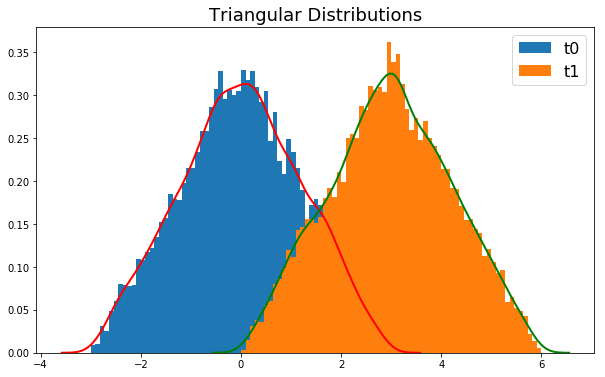

In [36]:
plt.figure(figsize = (10,6))

bins = np.linspace(-3,6, 100)
plt.hist(t0, bins, alpha=1, label='t0', normed = True)
plt.hist(t1, bins, alpha=1, label='t1', normed = True)

plt.title('Triangular Distributions', fontsize = 18)
plt.legend(loc='upper right', fontsize = 16)

sns.kdeplot(t0, linewidth=2, color = 'r')
sns.kdeplot(t1, linewidth=2, color = 'g')
plt.show()

In [37]:
t0set = set(t0)
unionset = t0set.union(t1)
Tau_max_triangular  = max(unionset) + 0.1
Tau_min_triangular = min(unionset) - 0.1
print(Tau_max_triangular)
print(Tau_min_triangular)

6.03722531806
-3.06588751061


In [38]:
tau_vec_triangular = np.linspace(Tau_min_triangular, Tau_max_triangular, 1000)
tpr_vec_triangular = np.zeros(len(tau_vec_triangular))
fpr_vec_triangular = np.zeros(len(tau_vec_triangular))

for i in range(0, len(tau_vec_triangular)):
    fpr_vec_triangular[i], tpr_vec_triangular[i] = fpr_tpr(t0,t1,tau_vec_triangular[i])

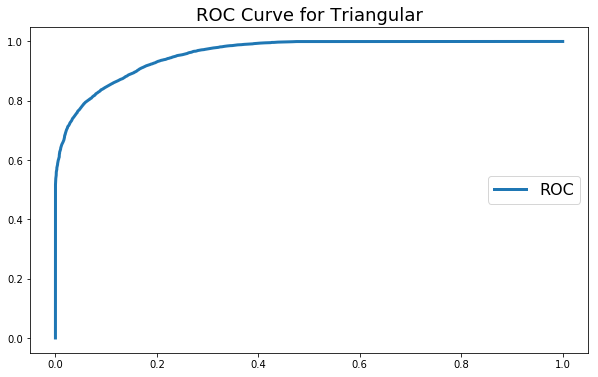

In [39]:
plt.figure(figsize = (10,6))


x = fpr_vec_triangular
y = tpr_vec_triangular

# plot the data
plt.plot(x,y, label = 'ROC', linewidth = 3)
plt.title('ROC Curve for Triangular', fontsize = 18)
plt.legend(fontsize = 16, loc = 'center right')


plt.show()